# Interlab from iGEM 2015


In [347]:
%matplotlib inline
import pylab as pl
from math import sqrt
import sys

# importing platemate
sys.path.insert(0, '../src')
import platemate

You first need to map each column in your plate to a colony or a control.

In [348]:
ColumnNames = {
    'C' : "Dev1",
    'D' : "Dev2",
    'E' : "Dev3"
    }

controlNames = {
    'A' : "LB",
    'B' : "LB+Cam",
    'F' : "+control",
    'G' : "-control1",
    'H' : "-control2"
    }

Then we create an object PlateMate

In [349]:
reload(platemate)
pm = platemate.PlateMate( colonyNames = ColumnNames, controlNames = controlNames )

aaa

In [350]:
print pm.getColonyNames()
print pm.getControlNames()

['Dev1', 'Dev3', 'Dev2']
['LB', '-control2', 'LB+Cam', '-control1', '+control']


Indexing and reading all files from the spectrometer.

In [351]:
pm.findFiles("medida")

print 'reading fluorescence...'
pm.readFluorescence()
print 'reading optical density...'
pm.readOpticalDensity()

reading fluorescence...
reading optical density...


Now the object pm has all information about plate readings. For instance, we can get a summary from one of the well sets defined before. As an example, let's try "LB".

In [352]:
pm.summary("LB")

,A01,A02,A03,A04,A05,A06,A07,A08,A09
0,896.879,924.144,899.629,796.180,936.492,826.367,759.291,792.928,946.623
1,946.583,938.596,928.959,790.242,946.989,838.949,777.353,790.383,963.707
2,694.778,774.716,718.264,533.280,735.652,606.997,629.488,703.695,852.307


If you want to see the whole dataset associated with that well set, use getFluorescence.

In [353]:
pm.getFluorescence("LB")

,A01,A02,A03,A04,A05,A06,A07,A08,A09
0,896.879,924.144,899.629,796.180,936.492,826.367,759.291,792.928,946.623
1,946.583,938.596,928.959,790.242,946.989,838.949,777.353,790.383,963.707
2,694.778,774.716,718.264,533.280,735.652,606.997,629.488,703.695,852.307
3,737.650,821.107,748.746,606.770,802.477,799.081,726.210,740.538,888.691
4,743.555,825.443,746.563,639.481,820.822,844.555,816.009,911.706,952.603
5,799.255,882.934,779.688,688.916,839.220,888.245,860.381,905.064,1024.023
6,782.279,809.345,773.809,742.165,820.198,836.612,880.490,901.366,1014.964
7,776.692,817.415,761.893,736.503,852.735,841.259,858.177,837.875,1007.036
8,776.348,877.195,747.081,723.228,825.820,858.616,866.621,996.143,998.920


Similarly, you can check the optical density associated with that particular well.

In [354]:
pm.getOpticalDensity("LB")

,A01,A02,A03,A04,A05,A06,A07,A08,A09
0,0.2661,0.3356,0.2544,0.3294,0.2807,0.2994,0.2424,0.2641,0.1133
1,0.2820,0.3573,0.2772,0.3622,0.3081,0.3329,0.2674,0.2913,0.1247
2,0.2820,0.3573,0.2772,0.3622,0.3081,0.3329,0.2674,0.2913,0.1247
3,0.3322,0.4105,0.3580,0.4219,0.3976,0.4179,0.3950,0.3974,0.1805
4,0.3322,0.4105,0.3580,0.4219,0.3976,0.4179,0.3950,0.3974,0.1805
5,0.3385,0.4095,0.3596,0.4139,0.3971,0.4018,0.3905,0.3776,0.1888
6,0.3464,0.4157,0.3699,0.4169,0.4054,0.3965,0.3873,0.3789,0.2007
7,0.3446,0.4203,0.3776,0.4336,0.4183,0.4082,0.4004,0.3973,0.2113
8,0.3545,0.4325,0.4016,0.4187,0.4292,0.4035,0.4060,0.4149,0.2361


Because the file also contained information about the temperature at the time of the reading, platemate will also sotre it for any possible analysis.

Plotting all wells for each population


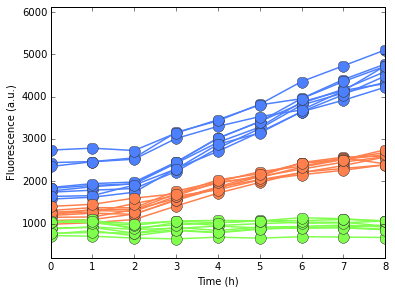

Plotting averages for each population


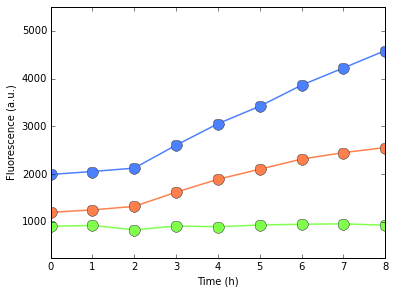

Plotting averages and 1-std intervals for each population


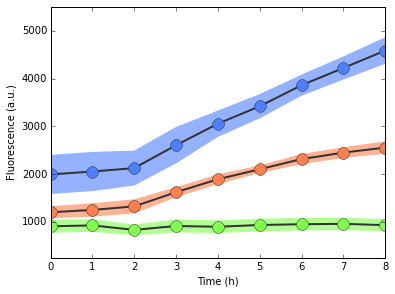

In [355]:
print "Plotting all wells for each population"
pl.figure(figsize=(6,4.5))
pm.plotIt(["Dev1","Dev2","Dev3"])
pl.show()

print "Plotting averages for each population"
pl.figure(figsize=(6,4.5))
pm.plotMean(["Dev1","Dev2","Dev3"])
pl.show()

print "Plotting averages and 1-std intervals for each population"
pl.figure(figsize=(6,4.5))
pm.plotFuzzyMean(["Dev1","Dev2","Dev3"])
pl.show()

In [356]:
pm.compareFluorescence("LB","Dev1")

(0.0, 4.4054724961400581e-28)

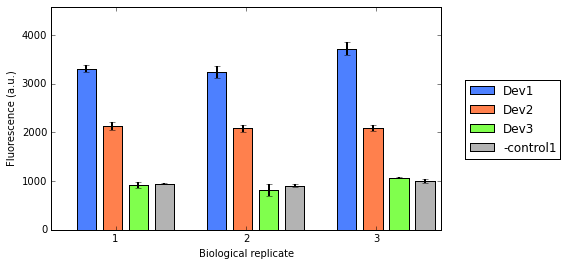

In [357]:
pl.figure(figsize=(7,4))
pm.plotBars(["Dev1","Dev2","Dev3","-control1"], 5)
pl.show()

In [358]:
print "Device 1 vs -control1:"
print pm.compareFluorescence("Dev1","-control1")
print "Device 2 vs -control1:"
print pm.compareFluorescence("Dev2","-control1")
print "Device 3 vs -control1:"
print pm.compareFluorescence("Dev3","-control1")

Device 1 vs -control1:
(6561.0, 4.4054724961400581e-28)
Device 2 vs -control1:
(6532.0, 1.2860869327145435e-27)
Device 3 vs -control1:
(3366.0, 0.77585226092928528)


The result above shows that we cannot rule out the hypothesis that Dev3 is not significantly larger than the negative control. This completely agrees with the bar plots comparing all devices and the negative control. In other words, this basically shows that no significant expression was observed in our device 3.

Is the expression of device 3 at least stronger than LB?

In [359]:
print "Device 3 vs LB:"
print pm.compareFluorescence("Dev3","LB")
print "-control vs LB:"
print pm.compareFluorescence("-control1","LB")

Device 3 vs LB:
(4800.0, 3.6135744993300728e-07)
-control vs LB:
(5225.0, 7.420359894394196e-11)


This shows that it is, although the negative control also shows a response significantly larger than the LB medium.

In [360]:
pm.ANOVA(["Dev1","Dev2","Dev3","-control1"])

(278.44071959391323, 7.5356734236160799e-89)

In [361]:
pm.TukeyHSD(["Dev1","Dev2","Dev3","-control1"])

,Group 1,Group 2,Mean diff,Reject H0?
0,Dev1,Dev2,-1245.353679,True
1,Dev1,Dev3,-2184.682000,True
2,Dev1,-control1,-2179.667951,True
3,Dev2,Dev3,-939.328321,True
4,Dev2,-control1,-934.314272,True
5,Dev3,-control1,5.014049,False
